# One Sample T-Test - Lab

## Introduction
Just as you previously used the t-distribution to provide confidence intervals for estimating the population mean, you can also use similar methods to test whether two populations are different, statistically speaking. To do this, you can use a t-test.

## Objectives
You will be able to:

* Perform a one sample t-test and make conclusions about an experiment based on the results

### Exercise 1: 

Create a function in Python `one_sample_ttest(sample, popmean, alpha)` that will take in sample data (an array of observations), the population mean and the alpha value to calculate and print out the t-statistic, critical t-value, and p-value for the sample and identify if the results are significant or not. The function should also create a visualization using `seaborn` of the distribution to check for normality.

In [7]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

def one_sample_ttest(sample, popmean, alpha):
   
    # Visualize sample distribution for normality
    plt.figure(figsize=(8, 5))
    sns.histplot(sample, kde=True, bins=10, color='blue', edgecolor='black')
    plt.axvline(np.mean(sample), color='red', linestyle='dashed', label='Sample Mean')
    plt.axvline(popmean, color='green', linestyle='dashed', label='Population Mean')
    plt.legend()
    plt.title("Sample Distribution with Normality Check")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.show()
    
    # Population mean
    print(f"Population Mean: {popmean}")
    
    # Sample mean (x̄) using NumPy mean()
    sample_mean = np.mean(sample)
    print(f"Sample Mean: {sample_mean:.4f}")
    
    # Sample Standard Deviation (sigma) using NumPy
    sample_std = np.std(sample, ddof=1)  # ddof=1 for sample standard deviation
    print(f"Sample Standard Deviation: {sample_std:.4f}")
    
    # Degrees of freedom
    df = len(sample) - 1
    print(f"Degrees of Freedom: {df}")
    
    # Calculate the critical t-value
    t_critical = stats.t.ppf(1 - alpha/2, df)
    print(f"Critical T-Value: ±{t_critical:.4f}")
    
    # Calculate the t-value and p-value
    t_stat, p_value = stats.ttest_1samp(sample, popmean)
    print(f"T-Statistic: {t_stat:.4f}")
    print(f"P-Value: {p_value:.4f}")
    
    # Check significance
    if abs(t_stat) > t_critical:
        print("Result: The result is statistically significant (reject H0).")
    else:
        print("Result: The result is not statistically significant (fail to reject H0).")
    
    # Return results
    return None

### Exercise 2:

Use the function created in Exercise 1 to answer the following analytical questions.

In a Python class, some of the students have taken online courses to improve their Python skills.
The scores of a random sample of 20 students who underwent the online-course on a Python test are as follows: 

     [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

The mean score of the class before the test is 65. The teacher thinks that the online training has really helped the students and now they should perform better than the class (population) mean. Use this to set your null and alternative hypotheses.

1. Test to see if the sample mean is significantly different from 65 at the .05 level. Report the t- and p-values.
2. The researcher realizes that she accidentally recorded the score that should have been 80.9 as 90.9. Are these corrected scores significantly different from 65 at the .05 level?

Bonus: What is the effect size of the first sample compared to the population? How can you interpret this effect size in relation to your significance test?


### Solution:

Test with original scores:


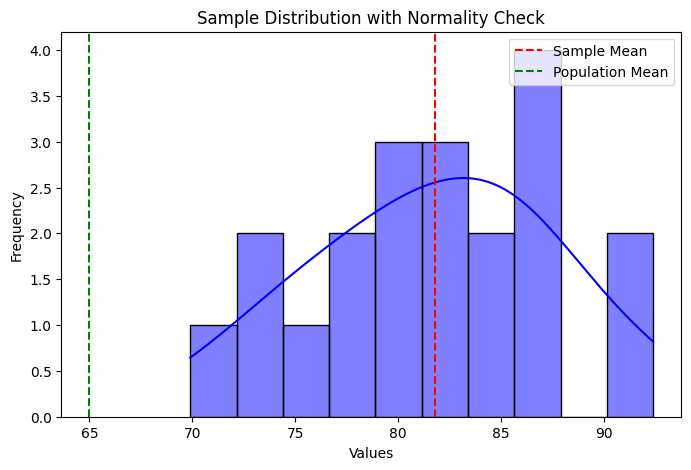

Population Mean: 65
Sample Mean: 81.8000
Sample Standard Deviation: 5.9217
Degrees of Freedom: 19
Critical T-Value: ±2.0930
T-Statistic: 12.6876
P-Value: 0.0000
Result: The result is statistically significant (reject H0).
None


In [14]:
# Data for analysis
sample_scores = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
                 78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]
class_mean = 65  # Population mean
alpha = 0.05

# First test
print("Test with original scores:")
result1 = one_sample_ttest(sample_scores, class_mean, alpha)
print(result1)


Test with corrected scores:


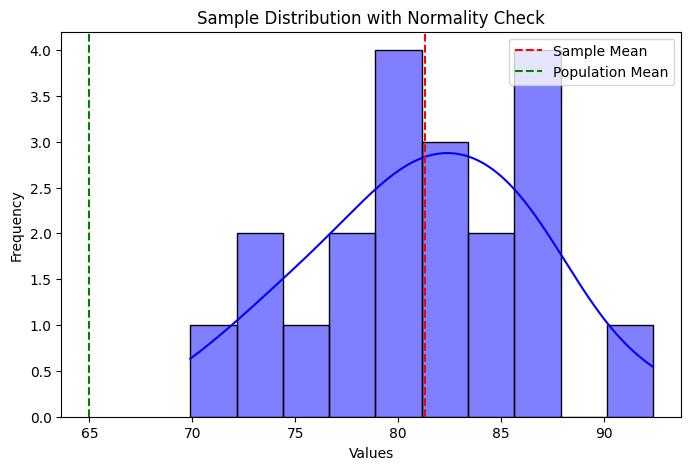

Population Mean: 65
Sample Mean: 81.3000
Sample Standard Deviation: 5.5215
Degrees of Freedom: 19
Critical T-Value: ±2.0930
T-Statistic: 13.2021
P-Value: 0.0000
Result: The result is statistically significant (reject H0).
None


In [16]:
# Corrected dataset (changing 90.9 to 80.9)
corrected_scores = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 80.9, 86.1, 81.0, 85.1, 
                     78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

# Second test
print("\nTest with corrected scores:")
result2 = one_sample_ttest(corrected_scores, class_mean, alpha)
print(result2)


In [18]:
# Bonus: Effect size (Cohen's d) calculation
def effect_size(sample, popmean):
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    d = (sample_mean - popmean) / sample_std
    return d


In [20]:
d_value = effect_size(sample_scores, class_mean)
print(f"\nEffect Size (Cohen's d): {d_value:.4f}")



Effect Size (Cohen's d): 2.8370


In [22]:
# Interpretation of effect size
if abs(d_value) < 0.2:
    interpretation = "small effect"
elif abs(d_value) < 0.5:
    interpretation = "medium effect"
else:
    interpretation = "large effect"

print(f"Interpretation: The effect size suggests a {interpretation} in relation to the significance test.")

Interpretation: The effect size suggests a large effect in relation to the significance test.


## Summary

In this lab, you saw a quick introduction to hypothesis testing using frequentist methods with t-values and p-values. You saw how a one sample t-test can be applied to contexts where the population mean is unknown and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these functions in Python. The lesson also briefly explains the comparison of using p-value for statistical significance vs. effect sizes. 